In [2]:
## We will find out 30-day 90-day and 180-day return for all price levels ($1 - $ 10) based on institutional holdings.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
daily_stock_data_filename = './../data/daily_data_2005-2021_filtered_nyse.pkl'
daily_stock_data = pd.read_pickle(daily_stock_data_filename)

daily_stock_data['trfd'].fillna(1, inplace=True)
daily_stock_data['ajexdi'].fillna(1, inplace=True)
daily_stock_data['date'] = pd.to_datetime(daily_stock_data['datadate'], format='%Y/%m/%d')
daily_stock_data['cusip_brief'] = daily_stock_data['cusip'].apply(lambda x: str(x)[:8])

In [4]:
# To pull institutional holdings data let's get the cusip of interest for the highest price level ($10)
min_prices = daily_stock_data.groupby('cusip')['prccd'].min()
min_prices = min_prices[min_prices < 10]
stocks_to_keep = min_prices.index

# Save the stocks to keep in a text file
with open('./../data/stocks_to_keep_at_10.txt', 'w') as f:
    for stock in stocks_to_keep:
        str_to_write = str(stock)[:8] + "\n"
        f.write(str_to_write)

Threshold: 5


C:\Users\amrit\AppData\Local\Temp\ipykernel_42320\3095674272.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  institutional_holdings = pd.read_csv(institutional_holdings_filename)


For stock CWH with ownership percentage 0.7716985586017637, the returns are [{'cusip': '13462K109', 'tic': 'CWH', 'ownershipPerc': 0.7716985586017637, 'startDate': Timestamp('2020-03-18 00:00:00'), 'returns': {'30': 0.9405684754521961, '90': 5.452878487612556, '180': 8.435662141506535}}].
Cusip: 13462K109


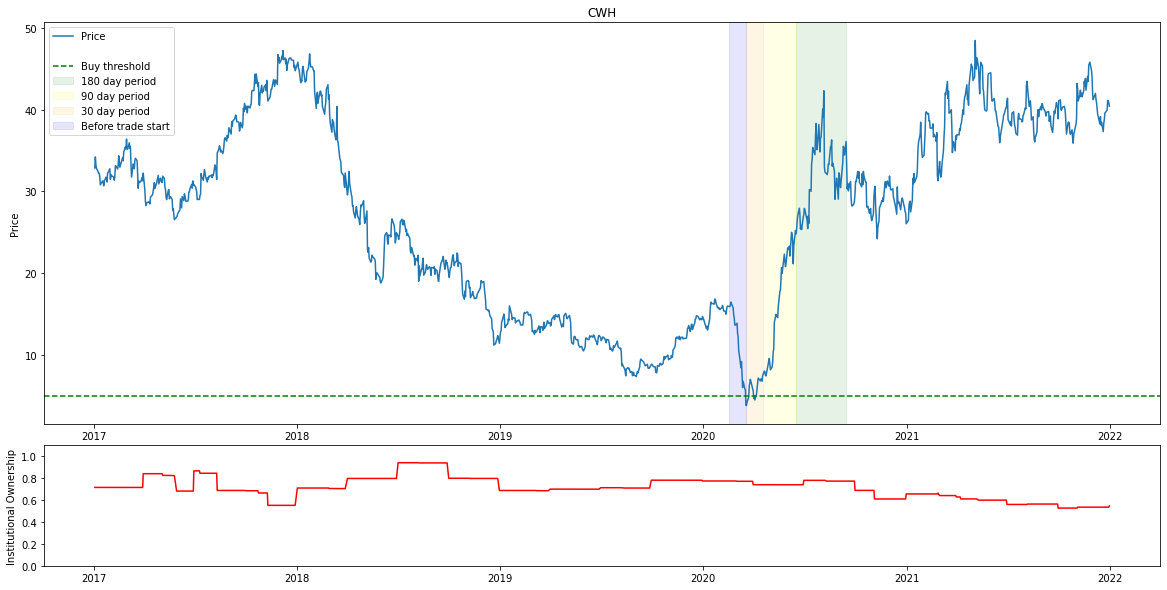

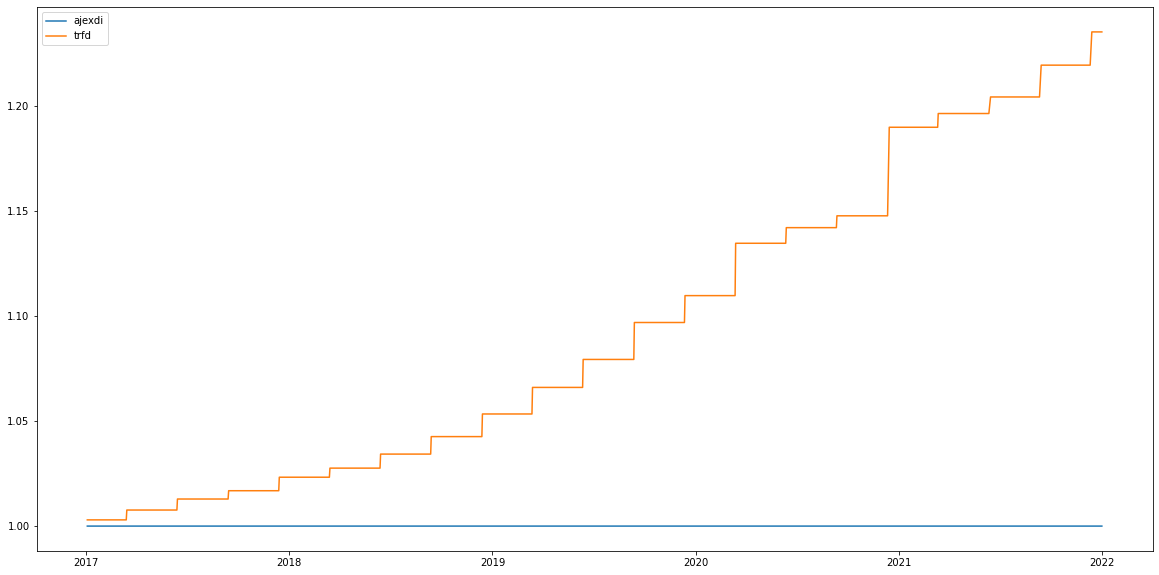

For stock VSLR with ownership percentage 0.8189325617358527, the returns are [{'cusip': '92854Q106', 'tic': 'VSLR', 'ownershipPerc': 0.9141228043837262, 'startDate': Timestamp('2016-03-02 00:00:00'), 'returns': {'30': -0.47852760736196276, '90': -0.26584867075664553, '180': -0.3456032719836404}}, {'cusip': '92854Q106', 'tic': 'VSLR', 'ownershipPerc': 0.8002312888872811, 'startDate': Timestamp('2017-08-02 00:00:00'), 'returns': {'30': 0.010101010101010388, '90': -0.2424242424242421, '180': -0.26262626262626165}}, {'cusip': '92854Q106', 'tic': 'VSLR', 'ownershipPerc': 0.7934205447025466, 'startDate': Timestamp('2018-06-21 00:00:00'), 'returns': {'30': 0.1500000000000008, '90': 6.661338147750939e-16, '180': -0.10999999999999932}}, {'cusip': '92854Q106', 'tic': 'VSLR', 'ownershipPerc': 0.7435892772457631, 'startDate': Timestamp('2019-03-06 00:00:00'), 'returns': {'30': 0.09663865546218453, '90': 0.40336134453781414, '180': 0.7457983193277304}}, {'cusip': '92854Q106', 'tic': 'VSLR', 'owners

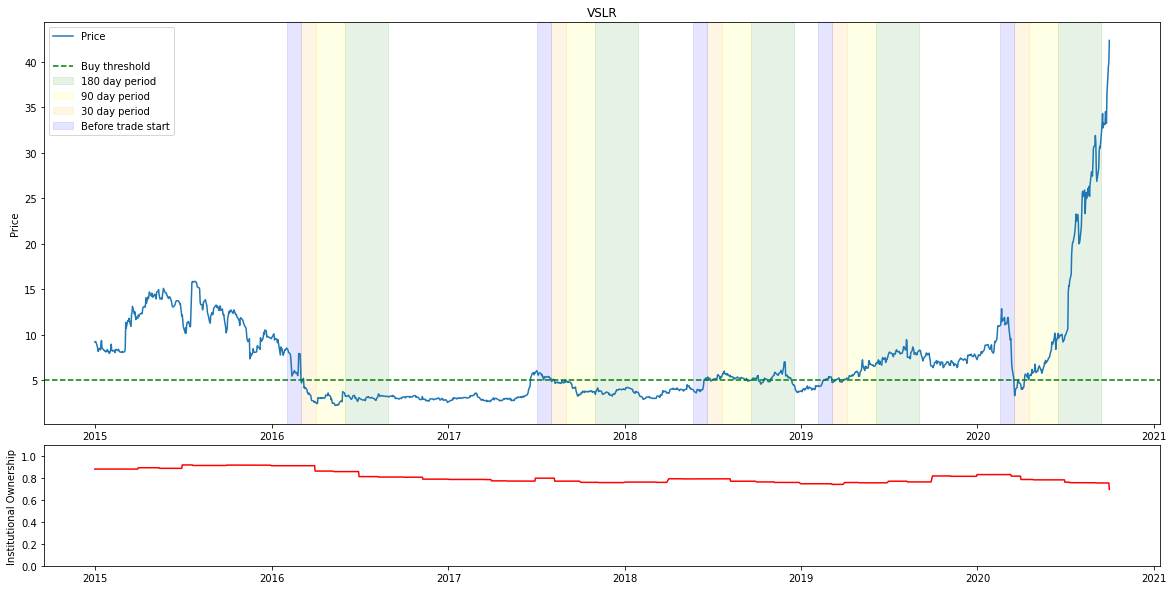

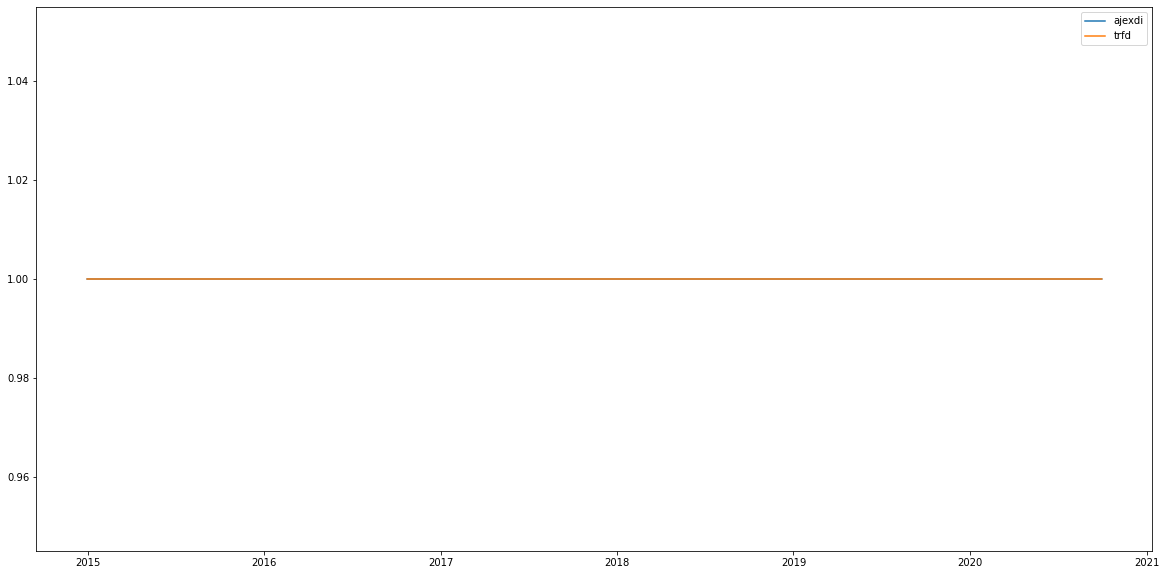

,mean,median
ownershipPercBin,,
0-20%,0.046467,0.020080
20-40%,0.053093,0.020040
40-60%,0.080496,0.037344
60-80%,0.083765,0.062525
80+,0.004671,-0.038750


,mean,median
ownershipPercBin,,
0-20%,0.109104,0.059135
20-40%,0.178962,0.083416
40-60%,0.197499,0.108718
60-80%,0.325858,0.219756
80+,0.068757,0.007500


,mean,median
ownershipPercBin,,
0-20%,0.142154,0.065728
20-40%,0.231207,0.103376
40-60%,0.295657,0.175992
60-80%,0.438575,0.218059
80+,0.199502,-0.102880


,cusip,tic,ownershipPerc,startDate,30,90,180,ownershipPercBin
930,36467W109,GME,0.736153,2020-08-24,1.061602,1.854209,8.445585,60-80%
379,13462K109,CWH,0.771699,2020-03-18,0.940568,5.452878,8.435662,60-80%
2230,92854Q106,VSLR,0.818933,2020-03-17,0.171694,1.273782,6.519722,80+
372,13123X508,CPE,3.575273,2020-09-25,0.047423,1.837113,6.503093,NaN
1928,83066R107,SKH,0.550798,2010-07-07,0.638158,1.625000,5.177632,40-60%
...,...,...,...,...,...,...,...,...
2282,96328L106,UP,0.192695,2021-11-18,-0.150602,-1.000000,-1.000000,0-20%
1508,624758207,MWA.B,0.711433,2008-10-24,-0.015452,0.421670,-1.000000,60-80%
766,30227H106,EXTN,0.526480,2021-10-21,-0.251012,-1.000000,-1.000000,40-60%
638,257867200,RRD,0.552438,2019-03-06,-0.036885,NaN,NaN,40-60%


In [9]:

for threshold in [5]:
    print(f"Threshold: {threshold}")

    # Keep stocks have hit threshold at some point
    min_prices = daily_stock_data.groupby('cusip')['prccd'].min()
    min_prices = min_prices[min_prices < threshold]
    stocks_to_keep = min_prices.index
    daily_stock_data_at_thresh = daily_stock_data[daily_stock_data['cusip'].isin(stocks_to_keep)]

    # Group by cusip and sort dates
    daily_stock_data_at_thresh = daily_stock_data_at_thresh.sort_values(['cusip', 'date'])

    # Get institutional holdings data
    institutional_holdings_filename = './../data/institutional_data_5_thresh.csv'
    institutional_holdings = pd.read_csv(institutional_holdings_filename)

    # groupby cusip and fdate and type and get the sum of shares
    institutional_holdings_agg = institutional_holdings.groupby(['cusip', 'fdate', 'type'])['shares'].sum().reset_index()
    # Just type == 5
    institutional_holdings_agg = institutional_holdings_agg[institutional_holdings_agg['type'] == 5]
    # Make fdate a datetime
    institutional_holdings_agg['fdate'] = pd.to_datetime(institutional_holdings_agg['fdate'], format='%Y/%m/%d')
    # make institution holdings agg daily instead of quarterly by resampling
    institutional_holdings_agg_daily = institutional_holdings_agg.set_index('fdate').groupby('cusip')['shares'].resample('D').ffill().reset_index()

    # Merge with daily stock data
    daily_stock_data_merged = daily_stock_data_at_thresh.merge(institutional_holdings_agg_daily, how='left', left_on=['cusip_brief', 'date'], right_on=['cusip', 'fdate'])

    # drop na cusip_y
    daily_stock_data_merged = daily_stock_data_merged.dropna(subset=['cusip_y'])

    # ownership percentage. shares / cshoc
    daily_stock_data_merged['instituional_ownership_perc'] = daily_stock_data_merged['shares'] / daily_stock_data_merged['cshoc']

    

    ## RUN STRATEGY ------------------------------------------------------------------------------------------------------------------##
    i = 0
    plot = False
    plot = False

    last_date = daily_stock_data_merged['date'].max()
    allTrades = []
    tradeStartDate = np.NaN
    cusip_of_interest = ['13462K109', '92854Q106']
    # Iterate over every stock by cusip
    for index, group in daily_stock_data_merged.groupby('cusip_x'):
        i += 1

        # If state is 0, then look for a buy signal (price <= threshold)
        #   If found, set state to 1 and set tradeStartDate to the date of the buy signal, , record the ownership percentage.
        # If state is 1, then look for whether it's been 30 days, 90 days, or 180 days since the tradeStartDate
        #   If it's been 30 days, then record cumulative return.
        #   If it's been 90 days, then record cumulative return.
        #   If it's been 180 days, then record cumulative return and set state to 0.

        returns = []

        returns_agg = {
            '30': -1,
            '90': -1,
            '180': -1
        }
        trades = []

        ownershipPerc = 0
        state = 6
        prevAdjPrice = np.NaN
        for index, day in group.iterrows():
            if(state == 6 and day['prccd'] > threshold):
                state = 0
            elif(state == 0 and day['prccd'] <= threshold):
                state = 1
                tradeStartDate = day['date']
                prevAdjPrice = day['prccd'] / day['ajexdi'] * day['trfd']
                ownershipPerc = day['instituional_ownership_perc']
                returns = []

            elif(state != 0 and state != 6):
                ret = 1 + (day['prccd'] / day['ajexdi'] * day['trfd'] - prevAdjPrice) / prevAdjPrice
                prevAdjPrice = day['prccd'] / day['ajexdi'] * day['trfd']
                returns.append(ret)
                if(day['date'] - tradeStartDate >= pd.Timedelta('30 days') and state == 1):
                    returns_agg['30'] = np.prod(returns) - 1
                    state = 2

                elif(day['date'] - tradeStartDate >= pd.Timedelta('90 days') and state == 2):
                    returns_agg['90'] = np.prod(returns) - 1
                    state = 3

                elif(day['date'] - tradeStartDate >= pd.Timedelta('180 days') and state == 3):
                    returns_agg['180'] = np.prod(returns) - 1
                    state = 6

                    trades.append({
                        'cusip' : group['cusip_x'].iloc[0],
                        'tic' : group['tic'].iloc[0],
                        'ownershipPerc' : ownershipPerc,
                        'startDate' : tradeStartDate,
                        'returns' : returns_agg.copy()
                    })

                    returns_agg = {
                        '30' : -1,
                        '90' : -1,
                        '180' : -1
                    }
                elif(day['date'] - datetime.timedelta(days = 4) >= last_date):
                    state = 5
                    break

        # Account for delistings
        if(state != 0 and state != 5 and state != 6):
            trades.append({
                'cusip' : group['cusip_x'].iloc[0],
                'tic' : group['tic'].iloc[0],
                'ownershipPerc' : ownershipPerc,
                'startDate' : tradeStartDate,
                'returns' : returns_agg.copy()
            })

        if(plot or group['cusip_x'].iloc[0] in cusip_of_interest):
            print("For stock " + group['tic'].iloc[0] + " with ownership percentage " + str(ownershipPerc) + ", the returns are " + str(trades) + ".")
            # Plot the price
            fig, ax = plt.subplots(figsize=(20, 10))
            ax.plot(group['date'], group['prccd'])

            group = group.copy()
            group['ajexdi_change'] = group['ajexdi'] - group['ajexdi'].shift(1)
            splits = group[group['ajexdi_change'] != 0]

            if(len(splits) > 0):
                # Big markers
                colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
                ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
            # Draw horizontal dashed line at threshold
            ax.axhline(y=threshold, linestyle='--', color='green')

            # Plot institutional ownership with twin y
            # height of ax2 is 0.2 of ax
            divider = make_axes_locatable(ax)
            ax2 = divider.append_axes("bottom", size="30%", pad=0.3)

            # set ax2 height

            ax2.plot(group['date'], group['instituional_ownership_perc'], color='red')
            ax2.set_ylim(0, 1.1)
            ax2.set_ylabel('Institutional Ownership')
            
            # Add ticker to title
            ax.set_title(group.iloc[0]['tic'])
            # Add y axis label
            ax.set_ylabel('Price')

            for trade in trades:
                ax.axvspan(trade['startDate'] + pd.Timedelta('90 days'), trade['startDate'] + pd.Timedelta('180 days'), alpha=0.1, color='green')
                ax.axvspan(trade['startDate'] + pd.Timedelta('30 days'), trade['startDate'] + pd.Timedelta('90 days'), alpha=0.1, color='yellow')
                ax.axvspan(trade['startDate'] , trade['startDate'] + pd.Timedelta('30 days'), alpha=0.1, color='orange')
                # pre trade period
                ax.axvspan(trade['startDate'] - pd.Timedelta('30 days'), trade['startDate'], alpha=0.1, color='blue')

            # add legend to ax
            ax.legend(['Price', '', 'Buy threshold', '180 day period', '90 day period', '30 day period', 'Before trade start'])

            print('Cusip: ' + str(group['cusip_x'].iloc[0]))

            # plot axjedi and trfd
            fig, ax = plt.subplots(figsize=(20, 10))
            ax.plot(group['date'], group['ajexdi'], label='ajexdi')
            ax.plot(group['date'], group['trfd'], label='trfd')

            ax.legend()

            plt.show()
        

        allTrades += trades



    # Make a df out of allTrades with columns startDate, ownershipPerc, 30, 90, 180, cusip, tic
    allTradesDf = pd.DataFrame(allTrades)
    # Unwrap the returns column with dict keys as columns and dict values as values
    allTradesDf = pd.concat([allTradesDf.drop(['returns'], axis=1), allTradesDf['returns'].apply(pd.Series)], axis=1)

    # Bin trades
    allTradesDf['ownershipPercBin'] = pd.cut(allTradesDf['ownershipPerc'], [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80+'])
    # Drop nan values
    allTradesDfDroppedNan = allTradesDf
    allTradesDfDroppedNan = allTradesDfDroppedNan[allTradesDfDroppedNan['30'] < 10]

    # Print the mean and median for each bin for the returns as a table
    display(allTradesDfDroppedNan.groupby('ownershipPercBin')['30'].agg(['mean', 'median']))
    display(allTradesDfDroppedNan.groupby('ownershipPercBin')['90'].agg(['mean', 'median']))
    display(allTradesDfDroppedNan.groupby('ownershipPercBin')['180'].agg(['mean', 'median']))


    # Sort 180 day returns
    allTradesDfDroppedNan = allTradesDfDroppedNan.sort_values(by=['180'], ascending=False)

    display(allTradesDfDroppedNan)

    





    